In [41]:
import pip
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [42]:
import pandas as pd
import numpy as np
import pandas.testing as tm
import matplotlib.pyplot as plt

In [43]:
data=pd.read_csv('/content/TotalOutcome.csv')

In [44]:
np.random.seed(1024)

In [45]:
y=data.CLASS
x=data.drop("CLASS", axis = 1)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
xcols = x_train.columns
xsols = x_test.columns

In [47]:
x_train.head()

,ID_C,BMI01,ETHANL03,CIGT01,MOVE,P_CARB,CHOL,DFIB,P_PROT,P_SFAT,P_TFAT,TOTCHOL_V1,CIGTYR01,CHOLMDCODE01,DIABTS02,ELEVEL01,GENDER,HDLSIU02,HYPERT04,LDLSIU02,RACEGRP,TCHSIU01,TRGSIU01,V1AGE01,HYPTMDCODE01,SBPA21,SBPA22,ANTA01,ANTA07A,ANTA07B,ECGMA31,HMTA03,APASIU01,APBSIU01,LIPA08,CHMA09
9873,11435,26.713342,15.1,1.0,6.375,44.361077,119.30,17.64,14.962199,13.359969,43.287386,137.0,290.0,0.0,0.0,3.0,1,1.618707,0.0,1.567245,0,3.54282,0.77901,45,0.0,90.0,41.0,151.0,83.0,102.0,51.0,5.7,1730.0,470.0,69.0,0.9
5745,6656,29.180696,0.0,3.0,7.625,42.932276,353.13,25.07,20.207383,12.579451,38.287968,169.0,0.0,0.0,1.0,2.0,0,1.817932,1.0,2.381732,1,4.37034,0.37257,50,1.0,120.0,77.0,180.0,102.0,107.0,69.0,8.9,1410.0,1030.0,68.0,1.2
7783,9046,30.649891,0.0,1.0,8.250,44.837890,177.35,9.57,18.759363,12.625077,38.077117,204.0,940.0,0.0,1.0,2.0,1,0.749940,1.0,2.777364,0,5.27544,3.81602,61,1.0,130.0,63.0,155.0,101.0,105.0,66.0,7.6,1290.0,1090.0,4.0,0.8
9854,11414,31.508498,167.0,2.0,7.125,38.830500,235.95,6.29,14.051851,13.402481,35.363257,218.0,60.0,0.0,0.0,5.0,0,0.846708,0.0,3.730512,0,5.63748,2.31445,47,0.0,117.0,79.0,188.0,109.0,112.0,63.0,4.5,1190.0,830.0,21.0,1.3
895,1053,25.952983,0.0,1.0,7.125,44.362550,165.54,11.05,18.079197,12.510175,38.343605,251.0,93.0,0.0,0.0,4.0,1,1.618707,1.0,4.417017,1,6.49086,0.99352,54,1.0,152.0,82.0,161.0,85.0,102.0,49.0,9.0,1330.0,900.0,351.0,1.2


In [48]:
!pip install impyute

In [49]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_x_train=mice(x_train.values, m = 5)


In [50]:
imputed_x_train

array([[1.14350000e+04, 2.67133419e+01, 1.51000000e+01, ...,
        4.70000000e+02, 6.90000000e+01, 9.00000000e-01],
       [6.65600000e+03, 2.91806958e+01, 0.00000000e+00, ...,
        1.03000000e+03, 6.80000000e+01, 1.20000000e+00],
       [9.04600000e+03, 3.06498912e+01, 0.00000000e+00, ...,
        1.09000000e+03, 4.00000000e+00, 8.00000000e-01],
       ...,
       [2.93600000e+03, 2.86145285e+01, 1.90700000e+02, ...,
        1.20000000e+03, 3.60000000e+01, 1.10000000e+00],
       [1.05760000e+04, 2.62576856e+01, 6.04000000e+01, ...,
        1.07000000e+03, 8.00000000e+00, 9.00000000e-01],
       [7.03500000e+03, 2.76562270e+01, 0.00000000e+00, ...,
        4.80000000e+02, 1.08000000e+02, 1.30000000e+00]])

In [51]:
imputed_x_train = pd.DataFrame(imputed_x_train,columns=xcols)

In [52]:
imputed_x_train

,ID_C,BMI01,ETHANL03,CIGT01,MOVE,P_CARB,CHOL,DFIB,P_PROT,P_SFAT,P_TFAT,TOTCHOL_V1,CIGTYR01,CHOLMDCODE01,DIABTS02,ELEVEL01,GENDER,HDLSIU02,HYPERT04,LDLSIU02,RACEGRP,TCHSIU01,TRGSIU01,V1AGE01,HYPTMDCODE01,SBPA21,SBPA22,ANTA01,ANTA07A,ANTA07B,ECGMA31,HMTA03,APASIU01,APBSIU01,LIPA08,CHMA09
0,11435.0,26.713342,15.1,1.0,6.375,44.361077,119.30,17.64,14.962199,13.359969,43.287386,137.0,290.0,0.0,0.0,3.0,1.0,1.618707,0.0,1.567245,0.0,3.54282,0.77901,45.0,0.0,90.0,41.0,151.0,83.0,102.0,51.0,5.7,1730.0,470.0,69.0,0.9
1,6656.0,29.180696,0.0,3.0,7.625,42.932276,353.13,25.07,20.207383,12.579451,38.287968,169.0,0.0,0.0,1.0,2.0,0.0,1.817932,1.0,2.381732,1.0,4.37034,0.37257,50.0,1.0,120.0,77.0,180.0,102.0,107.0,69.0,8.9,1410.0,1030.0,68.0,1.2
2,9046.0,30.649891,0.0,1.0,8.250,44.837890,177.35,9.57,18.759363,12.625077,38.077117,204.0,940.0,0.0,1.0,2.0,1.0,0.749940,1.0,2.777364,0.0,5.27544,3.81602,61.0,1.0,130.0,63.0,155.0,101.0,105.0,66.0,7.6,1290.0,1090.0,4.0,0.8
3,11414.0,31.508498,167.0,2.0,7.125,38.830500,235.95,6.29,14.051851,13.402481,35.363257,218.0,60.0,0.0,0.0,5.0,0.0,0.846708,0.0,3.730512,0.0,5.63748,2.31445,47.0,0.0,117.0,79.0,188.0,109.0,112.0,63.0,4.5,1190.0,830.0,21.0,1.3
4,1053.0,25.952983,0.0,1.0,7.125,44.362550,165.54,11.05,18.079197,12.510175,38.343605,251.0,93.0,0.0,0.0,4.0,1.0,1.618707,1.0,4.417017,1.0,6.49086,0.99352,54.0,1.0,152.0,82.0,161.0,85.0,102.0,49.0,9.0,1330.0,900.0,351.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10918,696.0,31.227855,162.1,2.0,6.875,62.763194,118.19,16.75,10.909737,6.548243,17.271375,172.0,540.0,1.0,0.0,5.0,0.0,0.946321,1.0,2.405135,0.0,4.44792,2.39348,46.0,1.0,130.0,94.0,174.0,102.0,107.0,72.0,4.7,1040.0,770.0,36.0,1.1
10919,3081.0,28.348794,331.9,2.0,8.625,43.504504,308.21,11.03,12.732417,11.557213,29.191780,166.0,1200.0,0.0,0.0,2.0,0.0,1.195353,0.0,1.923363,0.0,4.29276,2.56283,50.0,0.0,115.0,73.0,175.0,103.0,102.0,62.0,5.8,1300.0,790.0,55.0,1.1
10920,2936.0,28.614529,190.7,3.0,6.375,30.799793,189.07,6.42,19.300209,13.831996,35.535630,238.0,0.0,0.0,1.0,5.0,0.0,1.008540,1.0,4.054848,0.0,6.15468,2.38219,59.0,1.0,112.0,77.0,176.0,103.0,105.0,61.0,7.1,1410.0,1200.0,36.0,1.1
10921,10576.0,26.257686,60.4,2.0,7.250,48.797843,155.87,10.35,18.063397,8.922437,29.023228,219.0,640.0,0.0,0.0,3.0,1.0,1.170449,1.0,3.944659,0.0,5.66334,1.19674,49.0,1.0,165.0,84.0,154.0,91.0,102.0,75.0,8.6,1280.0,1070.0,8.0,0.9


In [53]:
imputed_x_train.isna().sum()

ID_C            0
BMI01           0
ETHANL03        0
CIGT01          0
MOVE            0
P_CARB          0
CHOL            0
DFIB            0
P_PROT          0
P_SFAT          0
P_TFAT          0
TOTCHOL_V1      0
CIGTYR01        0
CHOLMDCODE01    0
DIABTS02        0
ELEVEL01        0
GENDER          0
HDLSIU02        0
HYPERT04        0
LDLSIU02        0
RACEGRP         0
TCHSIU01        0
TRGSIU01        0
V1AGE01         0
HYPTMDCODE01    0
SBPA21          0
SBPA22          0
ANTA01          0
ANTA07A         0
ANTA07B         0
ECGMA31         0
HMTA03          0
APASIU01        0
APBSIU01        0
LIPA08          0
CHMA09          0
dtype: int64

In [54]:
imputed_x_train.shape

(10923, 36)

In [55]:
m1 = x_train.dtypes
m2 = x_test.dtypes

In [56]:
m1

ID_C              int64
BMI01           float64
ETHANL03        float64
CIGT01          float64
MOVE            float64
P_CARB          float64
CHOL            float64
DFIB            float64
P_PROT          float64
P_SFAT          float64
P_TFAT          float64
TOTCHOL_V1      float64
CIGTYR01        float64
CHOLMDCODE01    float64
DIABTS02        float64
ELEVEL01        float64
GENDER            int64
HDLSIU02        float64
HYPERT04        float64
LDLSIU02        float64
RACEGRP           int64
TCHSIU01        float64
TRGSIU01        float64
V1AGE01           int64
HYPTMDCODE01    float64
SBPA21          float64
SBPA22          float64
ANTA01          float64
ANTA07A         float64
ANTA07B         float64
ECGMA31         float64
HMTA03          float64
APASIU01        float64
APBSIU01        float64
LIPA08          float64
CHMA09          float64
dtype: object

In [57]:
m2

ID_C              int64
BMI01           float64
ETHANL03        float64
CIGT01          float64
MOVE            float64
P_CARB          float64
CHOL            float64
DFIB            float64
P_PROT          float64
P_SFAT          float64
P_TFAT          float64
TOTCHOL_V1      float64
CIGTYR01        float64
CHOLMDCODE01    float64
DIABTS02        float64
ELEVEL01        float64
GENDER            int64
HDLSIU02        float64
HYPERT04        float64
LDLSIU02        float64
RACEGRP           int64
TCHSIU01        float64
TRGSIU01        float64
V1AGE01           int64
HYPTMDCODE01    float64
SBPA21          float64
SBPA22          float64
ANTA01          float64
ANTA07A         float64
ANTA07B         float64
ECGMA31         float64
HMTA03          float64
APASIU01        float64
APBSIU01        float64
LIPA08          float64
CHMA09          float64
dtype: object

In [58]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_x_test=mice(x_test.values, m = 5)


In [59]:
imputed_x_test

array([[1.13940000e+04, 2.23699540e+01, 0.00000000e+00, ...,
        7.00000000e+02, 2.58000000e+02, 1.00000000e+00],
       [1.53760000e+04, 2.76634199e+01, 1.82300000e+02, ...,
        1.47000000e+03, 2.30000000e+01, 1.30000000e+00],
       [1.20950000e+04, 2.60461419e+01, 5.66000000e+01, ...,
        5.60000000e+02, 7.60000000e+01, 1.10000000e+00],
       ...,
       [1.14950000e+04, 2.24322730e+01, 9.24000000e+01, ...,
        9.80000000e+02, 7.00000000e+00, 1.10000000e+00],
       [9.46000000e+02, 2.30538692e+01, 2.64000000e+01, ...,
        1.52000000e+03, 5.20000000e+01, 1.20000000e+00],
       [2.44400000e+03, 2.55447032e+01, 1.66000000e+02, ...,
        1.49000000e+03, 7.00000000e+01, 1.00000000e+00]])

In [60]:
imputed_x_test = pd.DataFrame(imputed_x_test,columns=xcols)

In [61]:
imputed_x_test

,ID_C,BMI01,ETHANL03,CIGT01,MOVE,P_CARB,CHOL,DFIB,P_PROT,P_SFAT,P_TFAT,TOTCHOL_V1,CIGTYR01,CHOLMDCODE01,DIABTS02,ELEVEL01,GENDER,HDLSIU02,HYPERT04,LDLSIU02,RACEGRP,TCHSIU01,TRGSIU01,V1AGE01,HYPTMDCODE01,SBPA21,SBPA22,ANTA01,ANTA07A,ANTA07B,ECGMA31,HMTA03,APASIU01,APBSIU01,LIPA08,CHMA09
0,11394.0,22.369954,0.0,1.0,6.625,12.465220,282.67,5.50,28.590508,29.034104,59.678035,162.0,1350.0,0.0,0.0,5.0,0.0,1.163700,0.0,2.715300,0.0,4.18932,0.67740,59.0,0.0,101.0,61.0,174.0,80.0,92.0,58.0,10.8,1030.0,700.0,258.0,1.0
1,15376.0,27.663420,182.3,2.0,8.500,52.124511,81.38,19.24,12.070397,8.932477,24.510221,272.0,360.0,0.0,0.0,5.0,0.0,1.095740,0.0,5.260648,0.0,7.03392,1.47899,61.0,0.0,131.0,88.0,179.0,92.0,102.0,57.0,8.5,1410.0,1470.0,23.0,1.3
2,12095.0,26.046142,56.6,2.0,7.500,46.428722,122.74,11.27,17.423890,9.973691,30.353747,157.0,540.0,0.0,0.0,4.0,0.0,2.141673,0.0,1.535619,1.0,4.06002,0.83546,46.0,0.0,120.0,67.0,184.0,97.0,108.0,60.0,6.4,2490.0,560.0,76.0,1.1
3,11930.0,26.845963,54.0,3.0,8.125,52.281152,182.12,22.77,21.556806,9.543489,25.280035,180.0,0.0,0.0,0.0,6.0,1.0,1.369675,0.0,2.943773,0.0,4.65480,0.74514,47.0,0.0,115.0,77.0,162.0,99.0,106.0,67.0,8.4,1110.0,980.0,13.0,1.0
4,12254.0,28.437202,45.3,2.0,6.750,41.934642,173.44,6.83,15.502389,13.883307,40.341907,176.0,228.0,0.0,0.0,6.0,0.0,1.008540,1.0,3.175608,1.0,4.55136,0.80159,45.0,1.0,104.0,74.0,177.0,99.0,107.0,45.0,5.3,1200.0,930.0,79.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,9839.0,51.029176,0.0,3.0,6.875,41.223776,245.41,18.99,23.400100,12.632353,37.477167,180.0,0.0,0.0,1.0,4.0,1.0,1.111980,0.0,2.942868,1.0,4.65480,1.30964,47.0,0.0,129.0,82.0,161.0,149.0,146.0,75.0,3.6,1430.0,1110.0,126.0,0.9
2727,15061.0,25.350170,0.0,3.0,9.375,50.059695,551.90,26.74,18.075566,14.384779,34.432984,200.0,0.0,0.0,0.0,6.0,1.0,1.525740,1.0,3.165264,1.0,5.17200,1.04997,47.0,1.0,104.0,80.0,164.0,82.0,104.0,53.0,5.0,1460.0,670.0,466.0,1.4
2728,11495.0,22.432273,92.4,1.0,10.000,53.628835,174.92,12.87,18.676042,8.978309,22.058424,217.0,680.0,0.0,0.0,2.0,0.0,1.111980,1.0,3.997956,0.0,5.61162,1.09513,48.0,1.0,136.0,73.0,172.0,85.0,92.0,60.0,8.1,1410.0,980.0,7.0,1.1
2729,946.0,23.053869,26.4,1.0,6.250,48.153460,161.49,13.66,18.257133,11.915710,34.080298,288.0,725.0,0.0,0.0,2.0,0.0,0.846708,0.0,5.825172,0.0,7.44768,1.69350,47.0,0.0,109.0,75.0,182.0,88.0,93.0,73.0,8.5,790.0,1520.0,52.0,1.2


In [62]:
imputed_x_test.isna().sum()

ID_C            0
BMI01           0
ETHANL03        0
CIGT01          0
MOVE            0
P_CARB          0
CHOL            0
DFIB            0
P_PROT          0
P_SFAT          0
P_TFAT          0
TOTCHOL_V1      0
CIGTYR01        0
CHOLMDCODE01    0
DIABTS02        0
ELEVEL01        0
GENDER          0
HDLSIU02        0
HYPERT04        0
LDLSIU02        0
RACEGRP         0
TCHSIU01        0
TRGSIU01        0
V1AGE01         0
HYPTMDCODE01    0
SBPA21          0
SBPA22          0
ANTA01          0
ANTA07A         0
ANTA07B         0
ECGMA31         0
HMTA03          0
APASIU01        0
APBSIU01        0
LIPA08          0
CHMA09          0
dtype: int64

In [63]:
imputed_x_test = pd.DataFrame(imputed_x_test,columns=xsols)
imputed_x_test

,ID_C,BMI01,ETHANL03,CIGT01,MOVE,P_CARB,CHOL,DFIB,P_PROT,P_SFAT,P_TFAT,TOTCHOL_V1,CIGTYR01,CHOLMDCODE01,DIABTS02,ELEVEL01,GENDER,HDLSIU02,HYPERT04,LDLSIU02,RACEGRP,TCHSIU01,TRGSIU01,V1AGE01,HYPTMDCODE01,SBPA21,SBPA22,ANTA01,ANTA07A,ANTA07B,ECGMA31,HMTA03,APASIU01,APBSIU01,LIPA08,CHMA09
0,11394.0,22.369954,0.0,1.0,6.625,12.465220,282.67,5.50,28.590508,29.034104,59.678035,162.0,1350.0,0.0,0.0,5.0,0.0,1.163700,0.0,2.715300,0.0,4.18932,0.67740,59.0,0.0,101.0,61.0,174.0,80.0,92.0,58.0,10.8,1030.0,700.0,258.0,1.0
1,15376.0,27.663420,182.3,2.0,8.500,52.124511,81.38,19.24,12.070397,8.932477,24.510221,272.0,360.0,0.0,0.0,5.0,0.0,1.095740,0.0,5.260648,0.0,7.03392,1.47899,61.0,0.0,131.0,88.0,179.0,92.0,102.0,57.0,8.5,1410.0,1470.0,23.0,1.3
2,12095.0,26.046142,56.6,2.0,7.500,46.428722,122.74,11.27,17.423890,9.973691,30.353747,157.0,540.0,0.0,0.0,4.0,0.0,2.141673,0.0,1.535619,1.0,4.06002,0.83546,46.0,0.0,120.0,67.0,184.0,97.0,108.0,60.0,6.4,2490.0,560.0,76.0,1.1
3,11930.0,26.845963,54.0,3.0,8.125,52.281152,182.12,22.77,21.556806,9.543489,25.280035,180.0,0.0,0.0,0.0,6.0,1.0,1.369675,0.0,2.943773,0.0,4.65480,0.74514,47.0,0.0,115.0,77.0,162.0,99.0,106.0,67.0,8.4,1110.0,980.0,13.0,1.0
4,12254.0,28.437202,45.3,2.0,6.750,41.934642,173.44,6.83,15.502389,13.883307,40.341907,176.0,228.0,0.0,0.0,6.0,0.0,1.008540,1.0,3.175608,1.0,4.55136,0.80159,45.0,1.0,104.0,74.0,177.0,99.0,107.0,45.0,5.3,1200.0,930.0,79.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,9839.0,51.029176,0.0,3.0,6.875,41.223776,245.41,18.99,23.400100,12.632353,37.477167,180.0,0.0,0.0,1.0,4.0,1.0,1.111980,0.0,2.942868,1.0,4.65480,1.30964,47.0,0.0,129.0,82.0,161.0,149.0,146.0,75.0,3.6,1430.0,1110.0,126.0,0.9
2727,15061.0,25.350170,0.0,3.0,9.375,50.059695,551.90,26.74,18.075566,14.384779,34.432984,200.0,0.0,0.0,0.0,6.0,1.0,1.525740,1.0,3.165264,1.0,5.17200,1.04997,47.0,1.0,104.0,80.0,164.0,82.0,104.0,53.0,5.0,1460.0,670.0,466.0,1.4
2728,11495.0,22.432273,92.4,1.0,10.000,53.628835,174.92,12.87,18.676042,8.978309,22.058424,217.0,680.0,0.0,0.0,2.0,0.0,1.111980,1.0,3.997956,0.0,5.61162,1.09513,48.0,1.0,136.0,73.0,172.0,85.0,92.0,60.0,8.1,1410.0,980.0,7.0,1.1
2729,946.0,23.053869,26.4,1.0,6.250,48.153460,161.49,13.66,18.257133,11.915710,34.080298,288.0,725.0,0.0,0.0,2.0,0.0,0.846708,0.0,5.825172,0.0,7.44768,1.69350,47.0,0.0,109.0,75.0,182.0,88.0,93.0,73.0,8.5,790.0,1520.0,52.0,1.2


In [64]:
import sklearn.linear_model as sk
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1.0, penalty = 'l1', solver='liblinear',class_weight='balanced')
clf.fit(imputed_x_train,y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [65]:
imputed_x_train.nunique()

ID_C            10923
BMI01            4175
ETHANL03          771
CIGT01             14
MOVE               79
P_CARB          10922
CHOL             9602
DFIB             3290
P_PROT          10922
P_SFAT          10921
P_TFAT          10922
TOTCHOL_V1        434
CIGTYR01          688
CHOLMDCODE01       92
DIABTS02           90
ELEVEL01           28
GENDER              2
HDLSIU02          403
HYPERT04           62
LDLSIU02         8419
RACEGRP             2
TCHSIU01          423
TRGSIU01          658
V1AGE01            23
HYPTMDCODE01        7
SBPA21            162
SBPA22            116
ANTA01             74
ANTA07A           121
ANTA07B           110
ECGMA31           141
HMTA03            152
APASIU01          384
APBSIU01          384
LIPA08            937
CHMA09            133
dtype: int64

In [66]:
pred_visit_1 = clf.predict(imputed_x_test)
accuracy_score(pred_visit_1,y_test)

0.6536067374588063

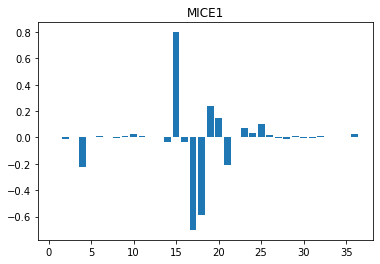

In [82]:
%matplotlib inline

plt.bar(list(range(1,37)),clf.coef_.ravel())
plt.title("MICE1")
plt.show()
plt.close()

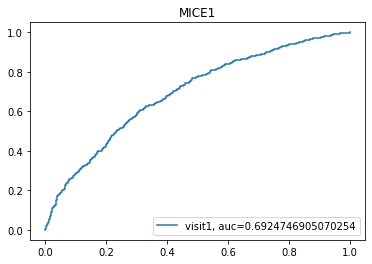

In [81]:
y_pred_proba = clf.predict_proba(imputed_x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="visit1, auc="+str(auc))
plt.legend(loc=4)
plt.title("MICE1")
plt.show()

In [72]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

In [76]:
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(imputed_x_test, y_test)

In [77]:
fi = {f:score for f,score in zip(range(0,37),list(fit.scores_))}

In [78]:
import operator
sorted_x = sorted(fi.items(), key=operator.itemgetter(1),reverse=True)

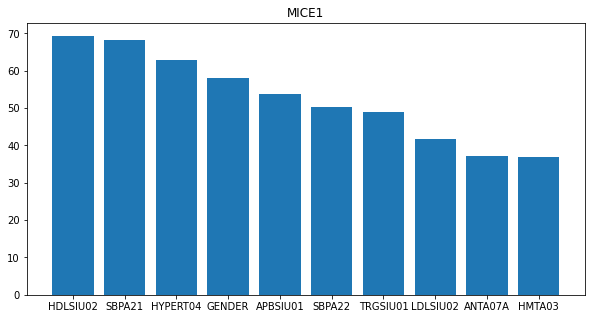

In [83]:
import numpy as np
import matplotlib.pyplot as plt
popularity_data = sorted_x[:10]

people = list(zip(*popularity_data))[0]
score = list(zip(*popularity_data))[1]
x_pos = np.arange(len(people)) 

plt.figure(figsize=(10,5))
plt.bar(x.columns[list(people)],score)
plt.xticks(x.columns[list(people)])
plt.title("MICE1")
plt.show()

In [67]:
.roc_auc_score(y_test, pred_visit_1)

SyntaxError: ignored

In [ ]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [ ]:
y_pred_proba = clf.predict_proba(imputed_x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 2, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data


# feature extraction
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(imputed_x_test, y)